# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Откроем файл с данными и изучим общую информацию

In [1]:
#Импортируем необходимые библиотеки для проекта
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#Откроем файл
df = pd.read_csv('/datasets/games.csv')

In [3]:
#Изучим строки в файле
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Посмотрим информацию в файле, какой тип данных у столбцов и общее количество строк
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Был открыт и изучен файл с данными. С первого взгляда можно заметить, что в некоторых столбцах есть пропуски, также все названия столбцов необходимо будет привести к нижнему регистру. В следующем пункте можно подробнее изучить пропуски в каждом столбце (заполнить по возможности), посмотреть количество дубликатов, а также заменить тип данных.

## Подготовим данные

In [5]:
#Приведём к нижнему регистру названия столбцов
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#Преобразуем данные в столбцах year_of_release в тип Int64
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [8]:
#Посмотрим, в каких столбцах сколько у нас пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#Посмотрим пропуски для жанра
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#Для столбца year_of_release напишем цикл, который заполнит год по названию игры с других платформ, если она на них имеется
for i in df[df['year_of_release'].isna() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [11]:
#Посмотрим, сколько осталось пропусков в столбце year_of_release
df['year_of_release'].isna().sum()

146

In [12]:
#Изучим значения столбца platform
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [13]:
#Изучим значения столбца genre
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [14]:
#Изучим значения столбца rating
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [15]:
#Изучим значения столбца user_score
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
1         2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [16]:
df['year_of_release'].value_counts()

2008    1440
2009    1431
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     785
2004     765
2012     662
2015     606
2014     582
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [17]:
#tbd - to be determined, to be done, это означает, что данные не заполнили специально, поэтому их можно заменить на Nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [18]:
#Вновь изучим значения столбца user_score
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.3      2
0.6      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [19]:
#Заменим значения столбца user_score на тип данных Float64
df['user_score'] = df['user_score'].astype('Float64')

In [20]:
#Посмотрим количество дубликатов в нашем датафрейме
df.duplicated().sum()

0

In [21]:
#Введём новый столбец total_sales, который будет показывать сумму продаж во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Можно еще взять метод **sum** с аргументом **axis=1**.
    
</div>

```python


df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
```

In [22]:
#Выведем на экран обновлённый датафрейм
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод

Были изучены и подготовлены данные для дальнейшего анализа, а именно:
- все названия столбцов были приведены к нижнему регистру;
- были просмотрены и изучены значения в столбцах нашего датафрейма;
- столбцы 'year_of_release' и 'user_score' были преобразованы в другой тип данных;
- для столбца 'year_of_release' были частично заполнены пропуски с помощью названия игр на других платформах;
- дубликаты отсутствуют;
- в столбце 'user_score' было значение tbd, которое означало to be determined, to be done, т.е. эти данные оставили незаполненными специально, поэтому они были заменены на NaN;
- был рассчитан новый столбец 'total_sales', который показывает общую сумму продаж со всех регионов;

## Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

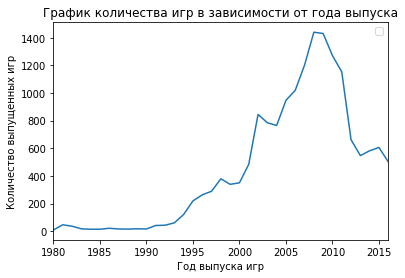

In [23]:
#Сделаем сводную таблицу с помощью метода pivot_table и для наглядности построим график с помощью метода plot
year_of_release_games_count = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release_games_count.plot()
plt.title('График количества игр в зависимости от года выпуска')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество выпущенных игр')
plt.legend('')

### Вывод

По графику можно сказать, что наибольший скачок по продажам игр был с 1990 до 2010, дальше игры стали выходить гораздо реже, скорее всего это говорит о том, что популярными стали мобильные приложения.

### Посмотрим, как менялись продажи по платформам

Text(0, 0.5, 'Сумма продаж')

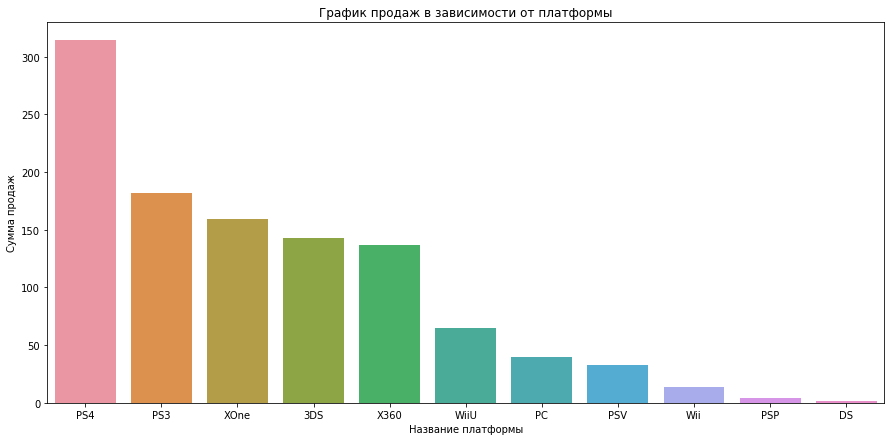

In [24]:
#Сделаем сводную таблицу с помощью метода pivot_table и для наглядности построим график с помощью библиотеки seaborn
platform_sales = df.query('year_of_release >= 2013').pivot_table(index='platform', values='total_sales', 
                                                                 aggfunc='sum').sort_values(
                                                                 by='total_sales', ascending=False)
plt.figure(figsize=(15,7))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title('График продаж в зависимости от платформы')
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж')

In [25]:
#Посмотрим топ-5 консолей по продажам в цифрах
platform_sales.head()

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [26]:
#Учитывая даты выхода консолей, для анализа топ-5 продаж возьмём промежуток с 2006 года, напишем для этого функцию
def total_sales_for_platforms_from_2006(platform_name, data):
    selection = data[(data['platform'] == platform_name) & (data['year_of_release'] >= 2013)]
    total = selection.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(
                                                                                                 by='year_of_release', 
                                                                                                ascending=False)
    return total

In [27]:
#Обозначим отдельно топ-5 платформ по продажам
top_5_platforms = platform_sales.head()
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


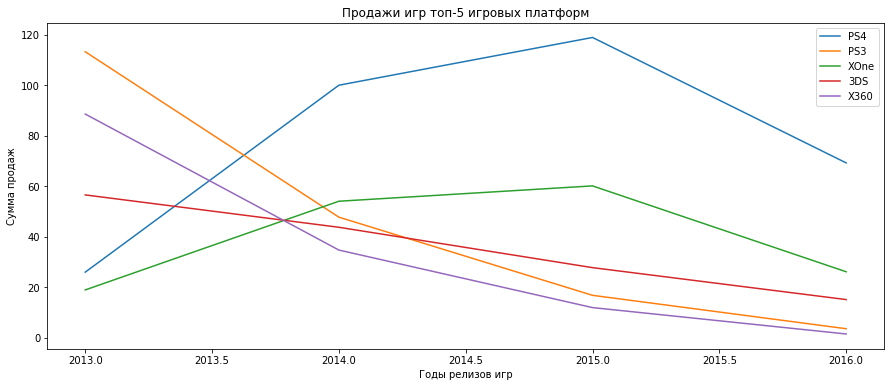

In [28]:
#Построим графики для продаж игр для топ-5 платформ с 2006 года
plt.figure(figsize=(15,6))
plt.title('Продажи игр топ-5 игровых платформ')
plt.xlabel('Годы релизов игр')
plt.ylabel('Сумма продаж')
for platform in list(top_5_platforms['platform']):
    sns.lineplot(data=total_sales_for_platforms_from_2006(platform, df)['total_sales'], label=platform)

### Вывод

Топ-5 консолей по продажам игр:
- PS4 - 314.14 млн. копий
- PS3 - 181.43 млн. копий
- XboxOne - 159.32 млн. копий
- 3DS - 143.25 млн. копий
- Xbox360 - 136.80 млн. копий

По графикам:
- Игры для PS4 продолжают продаваться и после 2016 года, остальные игры для других консолей же идут на спад;
- Пик продаж игр для всех консолей разный;

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [29]:
#Для начала выберем данные только для топ-5 платформ и сразу избавимся от выбросов
top_5_platform_sales = df.query(
    'platform in ["PS4", "X360", "PS3", "XOne", "3DS"] and total_sales < 1.4 and year_of_release >= 2013')
top_5_platform_sales['total_sales'].describe()

count    1302.000000
mean        0.261636
std         0.312161
min         0.010000
25%         0.040000
50%         0.120000
75%         0.360000
max         1.390000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

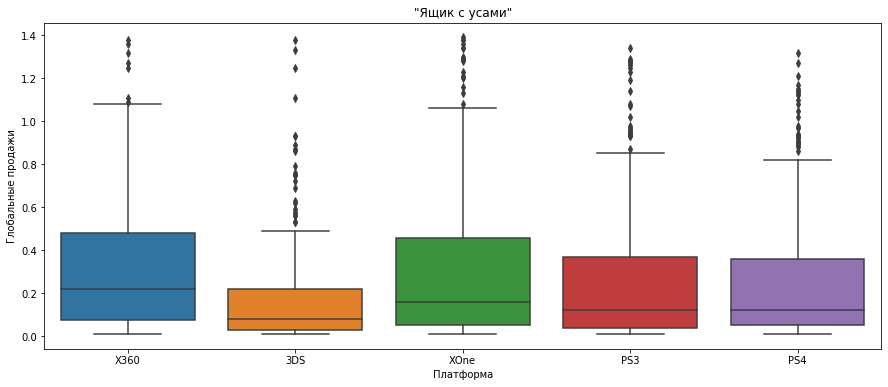

In [30]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15,6))
sns.boxplot(data=top_5_platform_sales, x='platform', y='total_sales')
plt.title('"Ящик с усами"')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

### Вывод

По "ящику с усами" видно, что медиана у всех протекает по-разному.
Выбросы скорее всего говорят о том, что есть игры, которые очень хорошо продавались.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [31]:
#Выберем самую популярную платформу по продажам игр за всё время (PS2)
sony_playstation_4 = df[(df['platform'] == 'PS4') & (df['year_of_release'] >= 2013)]

In [32]:
#Найдём коэффициент корреляции между продажами и отзывами пользователей
sony_playstation_4['user_score'].corr(sony_playstation_4['total_sales'])

-0.031957110204556424

In [33]:
#Найдём коэффициент корреляции между продажами и отзывами критиков
sony_playstation_4['critic_score'].corr(sony_playstation_4['total_sales'])

0.40656790206178095

Text(0.5, 1.0, 'Диаграмма рассеяния для пользователей')

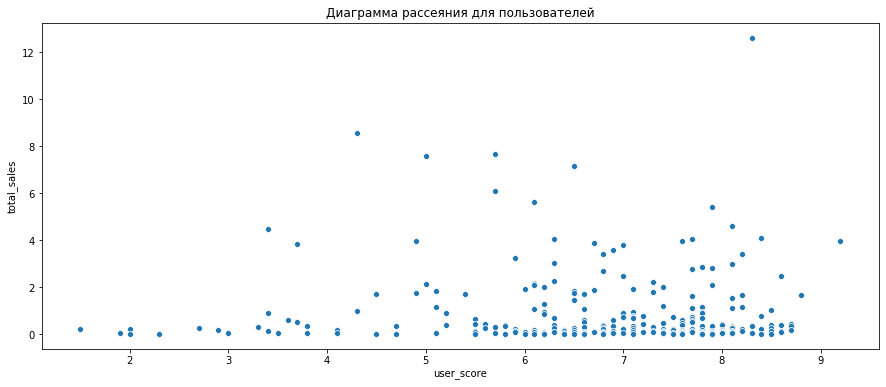

In [34]:
#Построим диаграмму рассеяния для продаж и отзывов пользователей
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_playstation_4)
plt.title('Диаграмма рассеяния для пользователей')

Text(0.5, 1.0, 'Диаграмма рассеяния для критиков')

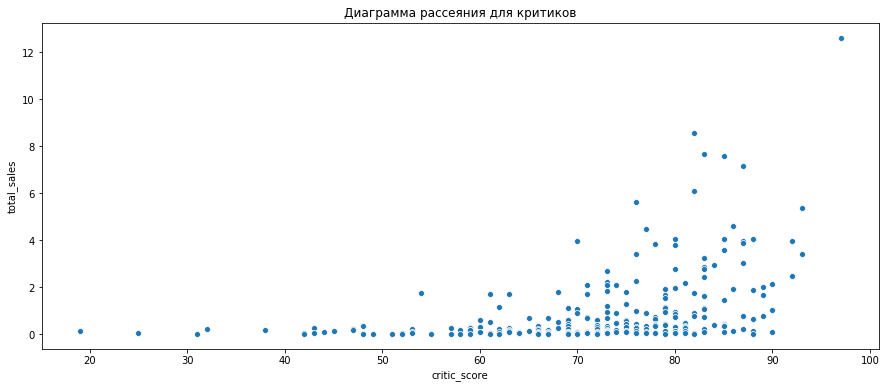

In [35]:
#Построим диаграмму рассеяния для продаж и отзывов критиков
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_playstation_4)
plt.title('Диаграмма рассеяния для критиков')

In [36]:
#Выберем оставшиеся популярные платформы по продажам игр из топ-5 за всё время
ds3 = df[(df['platform'] == '3DS') & (df['year_of_release'] >= 2013)]
xbox_360 = df[(df['platform'] == 'X360') & (df['year_of_release'] >= 2013)]
sony_playstation_3 = df[(df['platform'] == 'PS3') & (df['year_of_release'] >= 2013)]
xone = df[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2013)]

In [37]:
#Выведем все коэффициенты корреляции между продажами и отзывами пользователей для топ-5 платформ
print('Коэффициент корреляции между продажами и отзывами пользователей для PS4:', sony_playstation_4['user_score'].corr(
    sony_playstation_4['total_sales']))
print('Коэффициент корреляции между продажами и отзывами пользователей для 3DS:', ds3['user_score'].corr(ds3['total_sales']))
print('Коэффициент корреляции между продажами и отзывами пользователей для XBOX360:', xbox_360['user_score'].corr(
    xbox_360['total_sales']))
print('Коэффициент корреляции между продажами и отзывами пользователей для PS3:', sony_playstation_3['user_score'].corr(
    sony_playstation_3['total_sales']))
print('Коэффициент корреляции между продажами и отзывами пользователей для XBOXONE:', xone['user_score'].corr(
    xone['total_sales']))

Коэффициент корреляции между продажами и отзывами пользователей для PS4: -0.031957110204556424
Коэффициент корреляции между продажами и отзывами пользователей для 3DS: 0.24150411773563016
Коэффициент корреляции между продажами и отзывами пользователей для XBOX360: -0.011742185147181342
Коэффициент корреляции между продажами и отзывами пользователей для PS3: 0.0023944027357566925
Коэффициент корреляции между продажами и отзывами пользователей для XBOXONE: -0.06892505328279414


In [38]:
#Выведем все коэффициенты корреляции между продажами и отзывами критиков для топ-5 платформ
print('Коэффициент корреляции между продажами и отзывами критиков для PS4:', sony_playstation_4['critic_score'].corr(
    sony_playstation_4['total_sales']))
print('Коэффициент корреляции между продажами и отзывами критиков для 3DS:', ds3['critic_score'].corr(ds3['total_sales']))
print('Коэффициент корреляции между продажами и отзывами критиков для XBOX360:', xbox_360['critic_score'].corr(
    xbox_360['total_sales']))
print('Коэффициент корреляции между продажами и отзывами критиков для PS3:', sony_playstation_3['critic_score'].corr(
    sony_playstation_3['total_sales']))
print('Коэффициент корреляции между продажами и отзывами критиков для XBOXONE:', xone['critic_score'].corr(xone['total_sales']))

Коэффициент корреляции между продажами и отзывами критиков для PS4: 0.40656790206178095
Коэффициент корреляции между продажами и отзывами критиков для 3DS: 0.3570566142288103
Коэффициент корреляции между продажами и отзывами критиков для XBOX360: 0.3503445460228664
Коэффициент корреляции между продажами и отзывами критиков для PS3: 0.3342853393371919
Коэффициент корреляции между продажами и отзывами критиков для XBOXONE: 0.4169983280084017


Text(0.5, 1.0, 'Диаграмма рассеяния для пользователей для PS4')

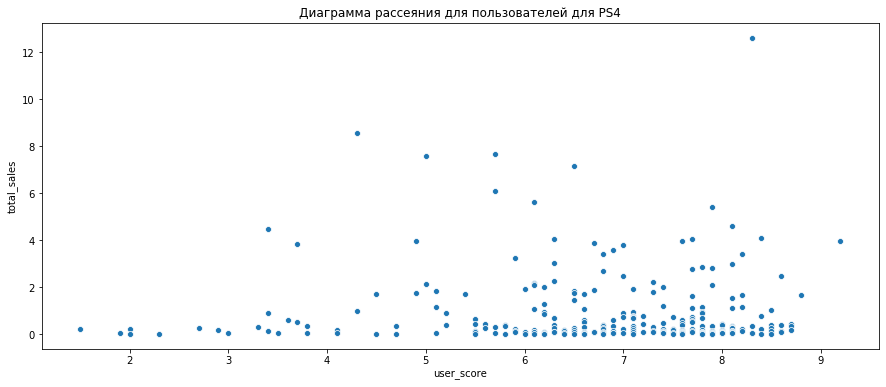

In [39]:
#Построим диаграмму рассеяния для продаж и отзывов пользователей/критиков для остальных платформ
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_playstation_4)
plt.title('Диаграмма рассеяния для пользователей для PS4')

Text(0.5, 1.0, 'Диаграмма рассеяния для критиков для PS4')

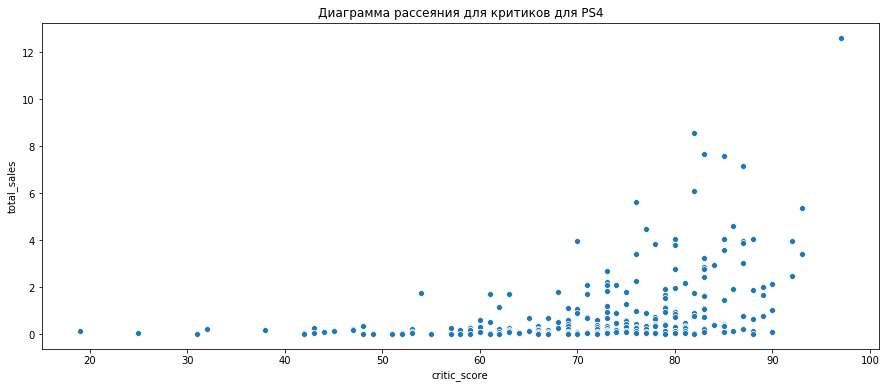

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_playstation_4)
plt.title('Диаграмма рассеяния для критиков для PS4')

Text(0.5, 1.0, 'Диаграмма рассеяния для пользователей для 3DS')

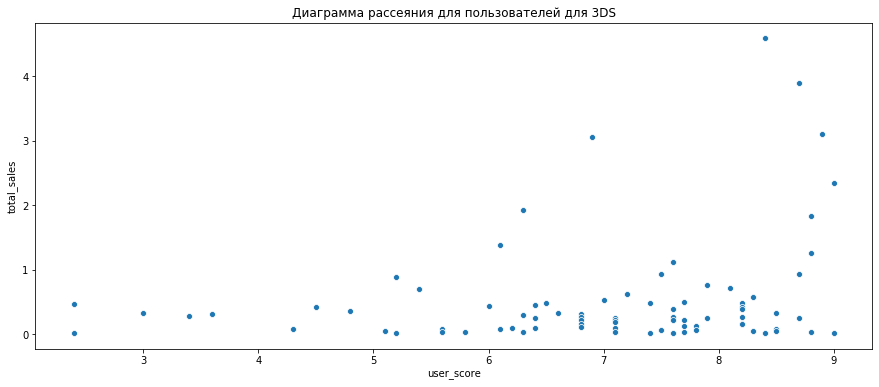

In [41]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=ds3)
plt.title('Диаграмма рассеяния для пользователей для 3DS')

Text(0.5, 1.0, 'Диаграмма рассеяния для критиков для 3DS')

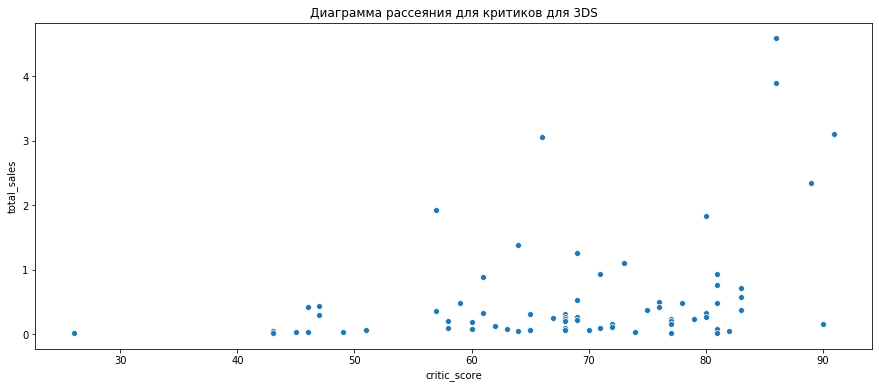

In [42]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ds3)
plt.title('Диаграмма рассеяния для критиков для 3DS')

Text(0.5, 1.0, 'Диаграмма рассеяния для пользователей для XBOX360')

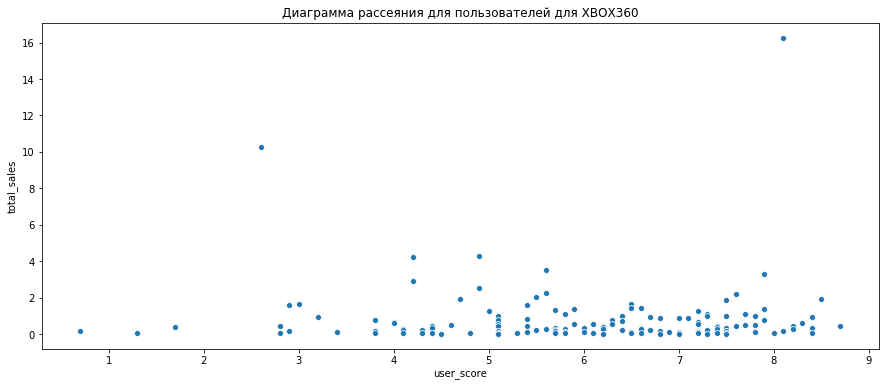

In [43]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=xbox_360)
plt.title('Диаграмма рассеяния для пользователей для XBOX360')

Text(0.5, 1.0, 'Диаграмма рассеяния для критиков для XBOX360')

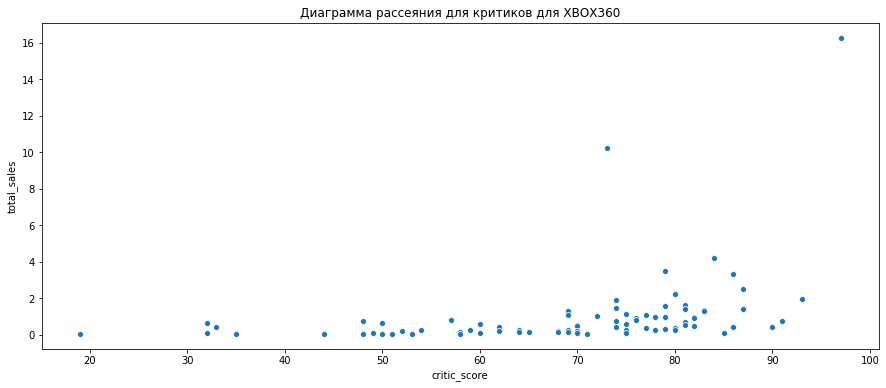

In [44]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xbox_360)
plt.title('Диаграмма рассеяния для критиков для XBOX360')

Text(0.5, 1.0, 'Диаграмма рассеяния для пользователей для PS3')

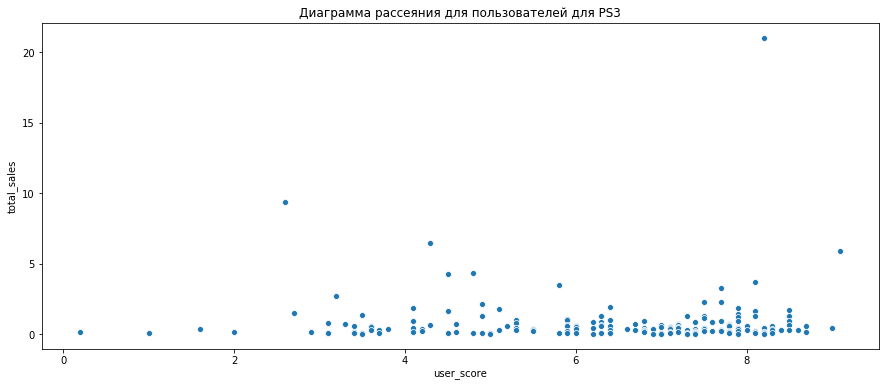

In [45]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_playstation_3)
plt.title('Диаграмма рассеяния для пользователей для PS3')

Text(0.5, 1.0, 'Диаграмма рассеяния для критиков для PS3')

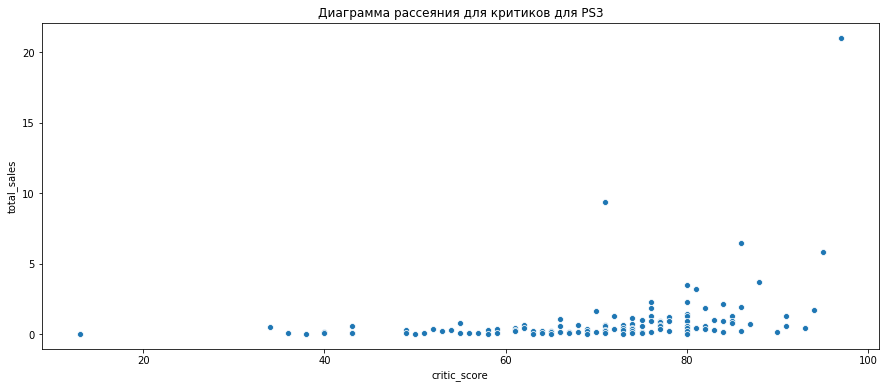

In [46]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_playstation_3)
plt.title('Диаграмма рассеяния для критиков для PS3')

Text(0.5, 1.0, 'Диаграмма рассеяния для пользователей для Xbox One')

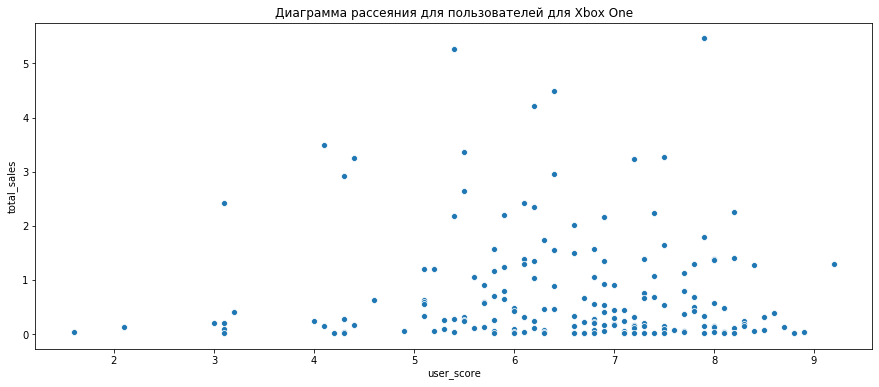

In [47]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=xone)
plt.title('Диаграмма рассеяния для пользователей для Xbox One')

Text(0.5, 1.0, 'Диаграмма рассеяния для критиков для Xbox One')

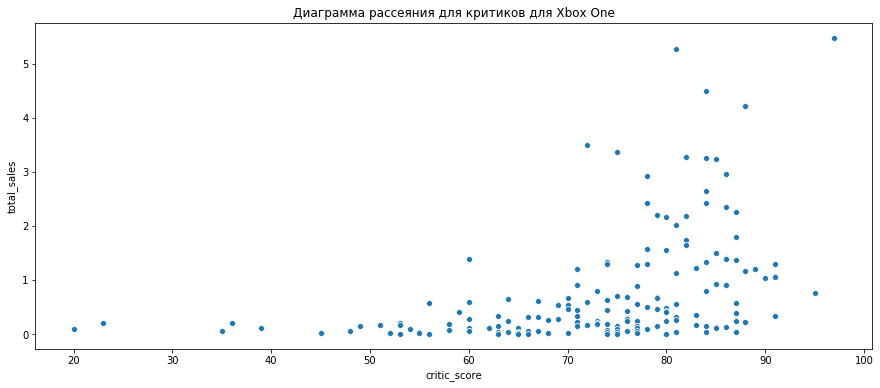

In [48]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone)
plt.title('Диаграмма рассеяния для критиков для Xbox One')

### Вывод

- Коэффициент корреляции между продажами и отзывами пользователей для PS4: -0.031957110204556424
- Коэффициент корреляции между продажами и отзывами пользователей для 3DS: 0.24150411773563016
- Коэффициент корреляции между продажами и отзывами пользователей для XBOX360: -0.011742185147181342
- Коэффициент корреляции между продажами и отзывами пользователей для PS3: 0.0023944027357566925
- Коэффициент корреляции между продажами и отзывами пользователей для XBOXONE: -0.06892505328279414
- Коэффициент корреляции между продажами и отзывами критиков для PS4: 0.40656790206178095
- Коэффициент корреляции между продажами и отзывами критиков для 3DS: 0.3570566142288103
- Коэффициент корреляции между продажами и отзывами критиков для XBOX360: 0.3503445460228664
- Коэффициент корреляции между продажами и отзывами критиков для PS3: 0.3342853393371919
- Коэффициент корреляции между продажами и отзывами критиков для XBOXONE: 0.4169983280084017

По этим данным можно сказать, что есть небольшая зависимость между продажами и отзывами пользователей/критиков, но она не настолько сильная (особенно по отзывам пользователей). Самая большая зависимость между продажами и отзывами критиков для Xbox One и PS4, скорее всего иногда люди прислушиваются к мнению критиков, но тоже не всегда.

### Посмотрим на общее распределение игр по жанрам

In [49]:
#Изучим продажи в зависимости от жанра, сделаем сводную таблицу
genre_sales = df.query('year_of_release >= 2013').pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
                                                                                            by='total_sales', ascending=False)
genre_sales = genre_sales.reset_index().rename_axis(None, axis=1)
genre_sales

,genre,total_sales
0,Action,322.50
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,63.06
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Text(0, 0.5, 'Продажи')

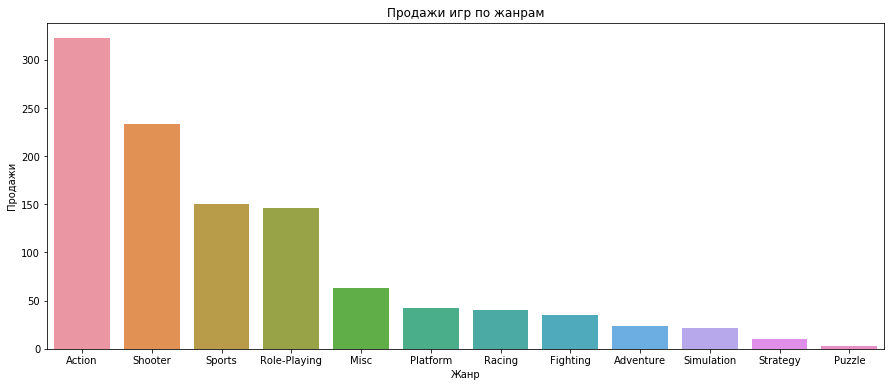

In [50]:
#Построим график
plt.figure(figsize=(15,6))
sns.barplot(data=genre_sales, x='genre', y='total_sales')
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

In [51]:
#Изучим cредние продажи в зависимости от жанра, сделаем сводную таблицу
genre_sales_mean = df.query('year_of_release >= 2013').pivot_table(index='genre', values='total_sales', 
                                                                   aggfunc='mean').sort_values(by='total_sales', 
                                                                                               ascending=False)
genre_sales_mean = genre_sales_mean.reset_index().rename_axis(None, axis=1)
genre_sales_mean

,genre,total_sales
0,Shooter,1.245882
1,Sports,0.703972
2,Platform,0.576081
3,Role-Playing,0.499623
4,Racing,0.469294
5,Fighting,0.441375
6,Action,0.419376
7,Misc,0.404231
8,Simulation,0.350968
9,Puzzle,0.186471


Text(0, 0.5, 'Продажи')

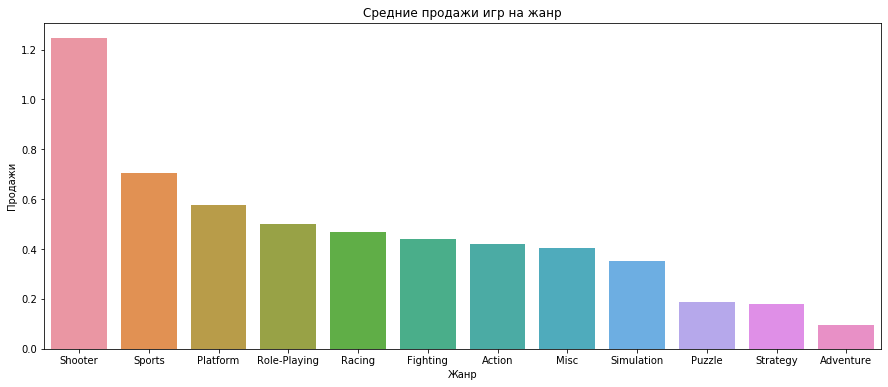

In [52]:
#Построим график
plt.figure(figsize=(15,6))
sns.barplot(data=genre_sales_mean, x='genre', y='total_sales')
plt.title('Средние продажи игр на жанр')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

### Вывод

Лучше всего продавались игры жанров Action и Shooter, хуже всего продавались стратегии и симуляторы с паззлами.

- Action - 322.50 млн. копий
- Shooter - 232.98 млн. копий
- Sports - 150.65 млн. копий
- Role-Playing - 145.89 млн. копий
- Misc - 63.06 млн. копий
- Platform - 42.63 млн. копий
- Racing - 39.89 млн. копий
- Fighting - 35.31 млн. копий
- Adventure - 23.64 млн. копий
- Simulation - 21.76 млн. копий
- Strategy - 10.08 млн. копий
- Puzzle - 3.17 млн. копий 


## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5). Опишем различия в долях продаж

In [53]:
#Создадим сводную таблицу для платформ с продажами только в регионе NA
na_platform_sales = df.query('year_of_release >= 2013').pivot_table(index='platform', values='na_sales', 
                                                                    aggfunc='sum').sort_values(by='na_sales',
                                                                    ascending=False)                                                                                   
na_platform_sales = na_platform_sales.reset_index().rename_axis(None, axis=1)
na_platform_sales

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.19
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


Text(0, 0.5, 'Продажи')

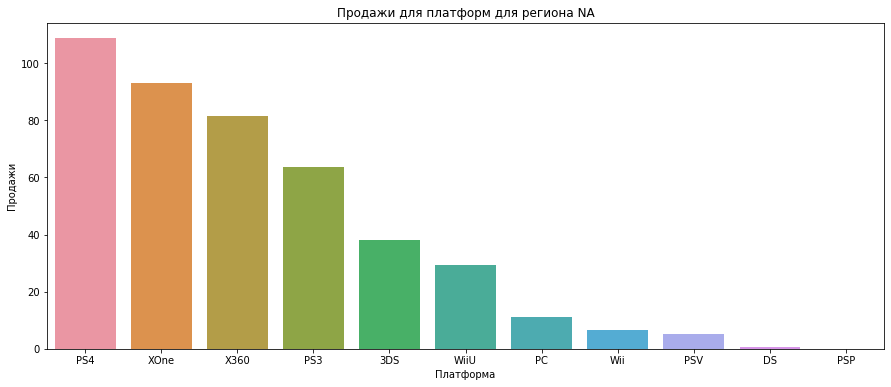

In [54]:
#Построим график для региона NA
plt.figure(figsize=(15,6))
sns.barplot(data=na_platform_sales, x='platform', y='na_sales')
plt.title('Продажи для платформ для региона NA')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

In [55]:
#Создадим сводную таблицу для платформ с продажами только в регионе EU
eu_platform_sales = df.query('year_of_release >= 2013').pivot_table(index='platform', values='eu_sales', 
                                                                    aggfunc='sum').sort_values(by='eu_sales',
                                                                                                   ascending=False)                                                                                   
eu_platform_sales = eu_platform_sales.reset_index().rename_axis(None, axis=1)
eu_platform_sales

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,PC,25.84
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


Text(0, 0.5, 'Продажи')

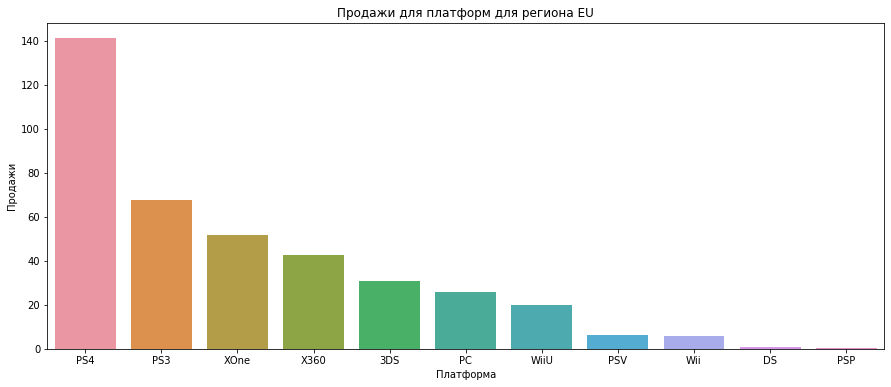

In [56]:
#Построим график для региона EU
plt.figure(figsize=(15,6))
sns.barplot(data=eu_platform_sales, x='platform', y='eu_sales')
plt.title('Продажи для платформ для региона EU')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

In [57]:
#Создадим сводную таблицу для платформ с продажами только в регионе JP
jp_platform_sales = df.query('year_of_release >= 2013').pivot_table(index='platform', values='jp_sales', 
                                                                    aggfunc='sum').sort_values(by='jp_sales',
                                                                                                   ascending=False)                                                                                   
jp_platform_sales = jp_platform_sales.reset_index().rename_axis(None, axis=1)
jp_platform_sales

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.53
6,X360,0.51
7,XOne,0.34
8,Wii,0.05
9,DS,0.00


Text(0, 0.5, 'Продажи')

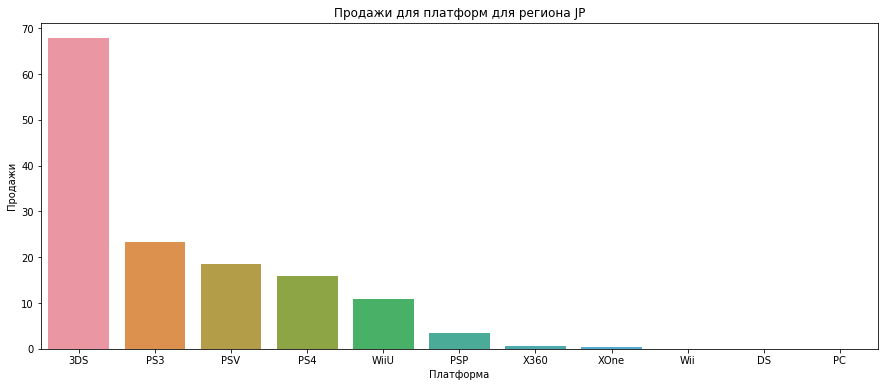

In [58]:
#Построим график для региона JP
plt.figure(figsize=(15,6))
sns.barplot(data=jp_platform_sales, x='platform', y='jp_sales')
plt.title('Продажи для платформ для региона JP')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

### Вывод

Самые популярные платформы (топ-5) по продажам в NA за период с 2013 года:
- PS4 - 108.74 млн. копий
- XOne - 93.12 млн. копий
- X360 - 81.66 млн. копий
- PS3 - 63.50 млн. копий
- 3DS - 38.20 млн. копий

Самые популярные платформы (топ-5) по продажам в EU за период с 2013 года:
- PS4 - 141.09 млн. копий
- PS3 - 67.81 млн. копий
- XOne - 51.59 млн. копий
- X360 - 42.52 млн. копий
- 3DS - 30.96 млн. копий

Самые популярные платформы (топ-5) по продажам в JP за период с 2013 года:
- 3DS - 67.81 млн. копий
- PS3 - 23.35 млн. копий
- PSV - 18.59 млн. копий
- PS4 - 15.96 млн. копий
- WiiU - 10.88 млн. копий

Видно, что во всех регионах были популярны консоли фирм Nintendo, Microsoft (кроме японского региона) и Sony, они входили в топ-5.

### Самые популярные жанры (топ-5)

In [59]:
#Создадим сводную таблицу для жанров с продажами только в регионе NA
na_genre_sales = df.query('year_of_release >= 2013').pivot_table(index='genre', values='na_sales', 
                                                                 aggfunc='sum').sort_values(by='na_sales',
                                                                                                   ascending=False)                                                                                   
na_genre_sales = na_genre_sales.reset_index().rename_axis(None, axis=1)
na_genre_sales

,genre,na_sales
0,Action,126.13
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


Text(0.5, 0, 'Жанр')

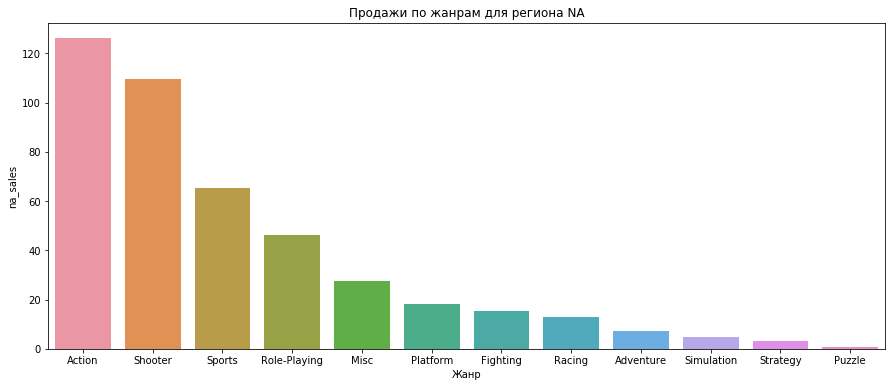

In [60]:
#Построим график для региона NA
plt.figure(figsize=(15,6))
sns.barplot(data=na_genre_sales, x='genre', y='na_sales')
plt.title('Продажи по жанрам для региона NA')
plt.xlabel('Жанр')

In [61]:
#Создадим сводную таблицу для жанров с продажами только в регионе EU
eu_genre_sales = df.query('year_of_release >= 2013').pivot_table(index='genre', values='eu_sales', 
                                                                 aggfunc='sum').sort_values(by='eu_sales',
                                                                                                   ascending=False)                                                                                   
eu_genre_sales = eu_genre_sales.reset_index().rename_axis(None, axis=1)
eu_genre_sales

,genre,eu_sales
0,Action,118.61
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


Text(0.5, 0, 'Жанр')

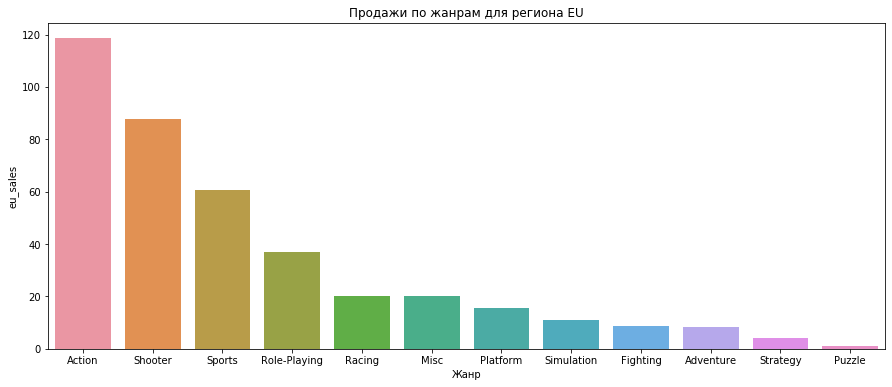

In [62]:
#Построим график для региона EU
plt.figure(figsize=(15,6))
sns.barplot(data=eu_genre_sales, x='genre', y='eu_sales')
plt.title('Продажи по жанрам для региона EU')
plt.xlabel('Жанр')

In [63]:
#Создадим сводную таблицу для жанров с продажами только в регионе JP
jp_genre_sales = df.query('year_of_release >= 2013').pivot_table(index='genre', values='jp_sales', 
                                                                 aggfunc='sum').sort_values(by='jp_sales',
                                                                                                   ascending=False)                                                                                   
jp_genre_sales = jp_genre_sales.reset_index().rename_axis(None, axis=1)
jp_genre_sales

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.44
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


Text(0.5, 0, 'Жанр')

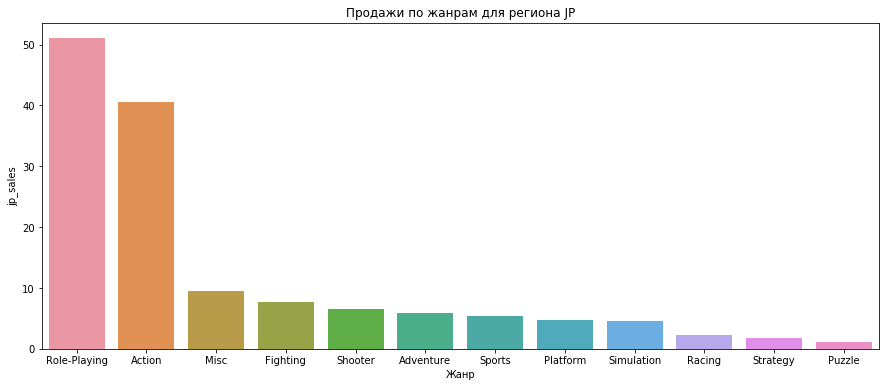

In [64]:
#Построим график для региона JP
plt.figure(figsize=(15,6))
sns.barplot(data=jp_genre_sales, x='genre', y='jp_sales')
plt.title('Продажи по жанрам для региона JP')
plt.xlabel('Жанр')

### Вывод

Самые популярные жанры (топ-5) в NA с 2013 года:
- Action - 126.13 млн.копий
- Shooter - 109.74 млн.копий
- Sports - 65.27 млн.копий
- Role-Playing - 46.40 млн.копий
- Misc - 27.49 млн.копий

Самые популярные жанры (топ-5) в EU с 2013 года:
- Action - 118.61 млн.копий
- Shooter - 87.86 млн.копий
- Sports - 60.52 млн.копий
- Role-Playing - 36.97 млн.копий
- Racing - 20.19 млн.копий

Самые популярные жанры (топ-5) в JP с 2013 года:
- Role-Playing - 51.04 млн.копий
- Action - 40.49 млн.копий
- Misc - 9.44 млн.копий
- Fighting - 7.65 млн.копий
- Shooter - 6.61 млн.копий

В принципе, во всех регионах в топ входят жанры Action, Role-Playing, Shooter, но есть и некоторая специфика для региона (например, в JP больше всего продавалось игр жанра Role-Playing).

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
#Создадим сводную таблицу для рейтинга с продажами только в регионе NA
df['rating'] = df['rating'].fillna('No rating')
na_rating_sales = df.query('year_of_release >= 2013').pivot_table(index='rating', values='na_sales', 
                                                                  aggfunc='sum').sort_values(by='na_sales',
                                                                                                   ascending=False)                                                                                   
na_rating_sales = na_rating_sales.reset_index().rename_axis(None, axis=1)
na_rating_sales

,rating,na_sales
0,M,165.29
1,No rating,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


Text(0.5, 0, 'Рейтинг ESRB')

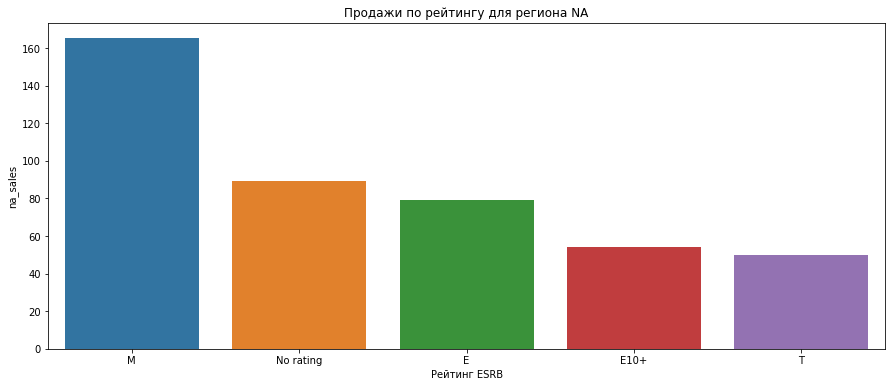

In [66]:
#Построим график для региона NA
plt.figure(figsize=(15,6))
sns.barplot(data=na_rating_sales, x='rating', y='na_sales')
plt.title('Продажи по рейтингу для региона NA')
plt.xlabel('Рейтинг ESRB')

In [67]:
#Создадим сводную таблицу для рейтинга с продажами только в регионе EU
eu_rating_sales = df.query('year_of_release >= 2013').pivot_table(index='rating', values='eu_sales', 
                                                                  aggfunc='sum').sort_values(by='eu_sales',
                                                                                                   ascending=False)                                                                                   
eu_rating_sales = eu_rating_sales.reset_index().rename_axis(None, axis=1)
eu_rating_sales

,rating,eu_sales
0,M,145.80
1,E,83.36
2,No rating,78.91
3,E10+,42.69
4,T,41.95


Text(0.5, 0, 'Рейтинг ESRB')

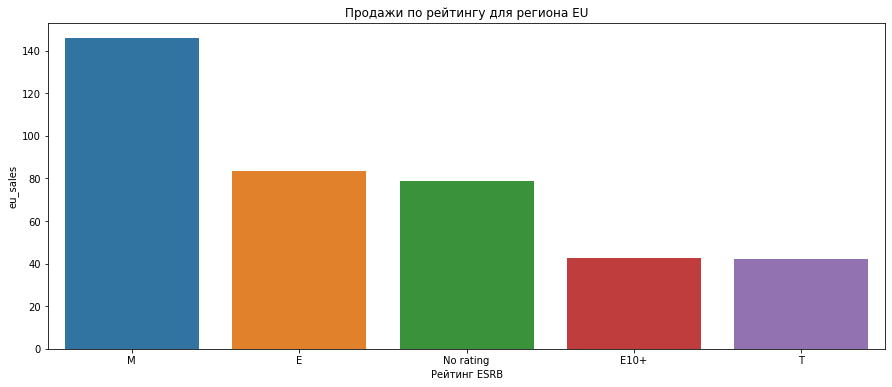

In [68]:
#Построим график для региона EU
plt.figure(figsize=(15,6))
sns.barplot(data=eu_rating_sales, x='rating', y='eu_sales')
plt.title('Продажи по рейтингу для региона EU')
plt.xlabel('Рейтинг ESRB')

In [69]:
#Создадим сводную таблицу для рейтинга с продажами только в регионе JP
jp_rating_sales = df.query('year_of_release >= 2013').pivot_table(index='rating', values='jp_sales', 
                                                                  aggfunc='sum').sort_values(by='jp_sales',
                                                                                                   ascending=False)                                                                                   
jp_rating_sales = jp_rating_sales.reset_index().rename_axis(None, axis=1)
jp_rating_sales

,rating,jp_sales
0,No rating,85.29
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


Text(0.5, 0, 'Рейтинг ESRB')

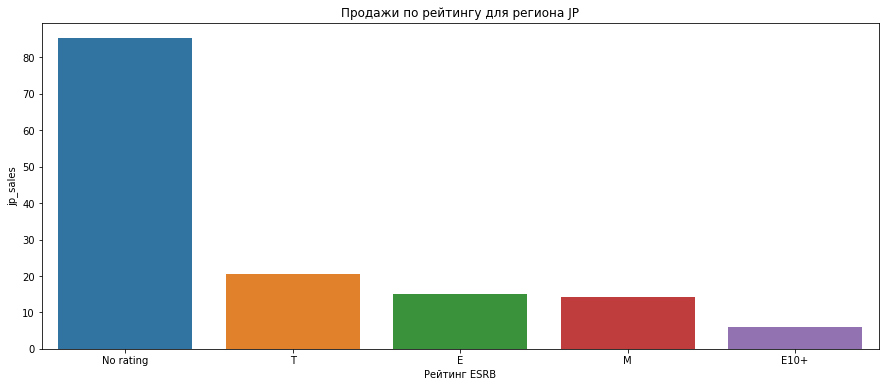

In [70]:
#Построим график для региона JP
plt.figure(figsize=(15,6))
sns.barplot(data=jp_rating_sales, x='rating', y='jp_sales')
plt.title('Продажи по рейтингу для региона JP')
plt.xlabel('Рейтинг ESRB')

### Вывод

Во всех регионах популярный рейтинг ESRB - No rating, E, T, M, E10+, поэтому можно сказать, что нет никакой специфики для отдельного региона.

No rating скорее всего говорит о том, что нет никакого возрастного ограничения для игр, или же просто забыли указать, когда вносились данные.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [71]:
#Возьмём рейтинг для Xbox One и PC с 2013 года, поскольку консоль вышла именно в 2013 году
pc_rating_from_2013 = df.query('platform == "PC" and year_of_release >= 2013')['user_score']
xbox_one_rating = df.query('platform == "XOne"')['user_score']

In [72]:
#Выведем средний рейтинг для каждой платформы
print('Средний рейтинг пользователей PC с 2013 года:', pc_rating_from_2013.mean())
print('Средний рейтинг пользователей Xbox One:', xbox_one_rating.mean())

Средний рейтинг пользователей PC с 2013 года: 6.280379746835442
Средний рейтинг пользователей Xbox One: 6.521428571428572


In [73]:
#Выполним проверку гипотезы
alpha = .05
results = st.ttest_ind(xbox_one_rating.dropna(), pc_rating_from_2013.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


In [74]:
#Для наглядности можем сравнить с рейтингом PC с 2006 года
pc_rating = df.query('platform == "PC" and year_of_release >= 2006')['user_score']
print('Средний рейтинг пользователей PC', pc_rating.mean())
print('Средний рейтинг пользователей Xbox One:', xbox_one_rating.mean())      

Средний рейтинг пользователей PC 6.835942492012778
Средний рейтинг пользователей Xbox One: 6.521428571428572


In [75]:
#Выполним проверку гипотезы
alpha = .05
results = st.ttest_ind(xbox_one_rating.dropna(), pc_rating.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008603496501781193
Отвергаем нулевую гипотезу


### Вывод

Для Xbox One и PC с 2013 года:

- Значение p-value чуть больше 16%, нулевую гипотезу не получилось отвергнуть.

Для Xbox One и PC с 2006 года:

- Значение p-value около 0.86%, нулевую гипотезу отвергаем.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем гипотезы:

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются;

In [76]:
#Возьмём рейтинг пользователей для жанров Action и Sports за всё время
action_rating = df.query('genre == "Action"')['user_score']
sports_rating = df.query('genre == "Sports"')['user_score']

In [77]:
#Посмотрим средние значения оценки пользователей для 2 жанров
print('Средний рейтинг пользователей жанра Action:', action_rating.mean())
print('Средний рейтинг пользователей жанра Sports:', sports_rating.mean())

Средний рейтинг пользователей жанра Action: 7.054043715846995
Средний рейтинг пользователей жанра Sports: 6.96119673617407


In [78]:
#Выполним проверку гипотезы
alpha = .05
results = st.ttest_ind(action_rating.dropna(), sports_rating.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


In [81]:
#Возьмём теперь те же самые данные, но с 2013 года
action_rating_from_2013 = df.query('genre == "Action" and year_of_release >= 2013')['user_score']
sports_rating_from_2013 = df.query('genre == "Sports" and year_of_release >= 2013')['user_score']

In [82]:
#Посмотрим средние значения оценки пользователей для 2 жанров
print('Средний рейтинг пользователей жанра Action с 2013 года:', action_rating_from_2013.mean())
print('Средний рейтинг пользователей жанра Sports с 2013 года:', sports_rating_from_2013.mean())

Средний рейтинг пользователей жанра Action с 2013 года: 6.8374999999999995
Средний рейтинг пользователей жанра Sports с 2013 года: 5.238124999999999


In [83]:
#Выполним проверку гипотезы
alpha = .05
results = st.ttest_ind(action_rating_from_2013.dropna(), sports_rating_from_2013.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


### Вывод

Для жанров Action и Sports за всё время:

- Значение p-value около 11%, нулевую гипотезу не получилось отвергнуть.

Для жанров Action и Sports с 2013 года:

 - Значение p-value большое, нулевую гипотезу отвергаем.

## Общий вывод

Были изучены и подготовлены данные для анализа, а именно:

- все названия столбцов были приведены к нижнему регистру;
- были просмотрены и изучены значения в столбцах нашего датафрейма;
- столбцы 'year_of_release' и 'user_score' были преобразованы в другой тип данных;
- для столбца 'year_of_release' были частично заполнены пропуски с помощью названия игр на других платформах;
- дубликаты отсутствуют;
- в столбце 'user_score' было значение tbd, которое означало to be determined, to be done, т.е. эти данные оставили незаполненными специально, поэтому они были заменены на NaN;
- был рассчитан новый столбец 'total_sales', который показывает общую сумму продаж со всех регионов;

Наибольший скачок по продажам игр был с 1990 до 2010, дальше игры стали выходить гораздо реже, скорее всего это говорит о том, что популярными стали мобильные приложения.

Топ-5 консолей по продажам игр с 2013 года:
- PS4 - 314.14 млн. копий
- PS3 - 181.43 млн. копий
- XboxOne - 159.32 млн. копий
- 3DS - 143.25 млн. копий
- Xbox360 - 136.80 млн. копий

Есть небольшая зависимость между продажами и отзывами пользователей/критиков, но она не настолько сильная (особенно по отзывам пользователей). Самая большая зависимость между продажами и отзывами критиков для Xbox One и PS4, скорее всего иногда люди прислушиваются к мнению критиков, но тоже не всегда.

Лучше всего продавались игры жанров Action и Shooter, хуже всего продавались стратегии и симуляторы с паззлами.

во всех регионах в топ входят жанры Action, Role-Playing, Shooter, но есть и некоторая специфика для региона (например, в JP больше всего продавалось игр жанра Role-Playing).

Самые популярные платформы (топ-3) по продажам в NA с 2013 года - PS4, Xbox One, Xbox 360

Самые популярные платформы (топ-3) по продажам в EU с 2013 года - PS4, PS3, Xbox One

Самые популярные платформы (топ-3) по продажам в JP с 2013 года - 3DS, PS3, PSV

Во всех регионах популярный рейтинг ESRB - No rating, E, T, M, E10+, поэтому можно сказать, что нет никакой специфики для отдельного региона.

No rating скорее всего говорит о том, что нет никакого возрастного ограничения для игр, или же просто забыли указать, когда вносились данные.

По гипотезам:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - эту гипотезу можно как принять, так и опровергнуть, всё зависит от рассматриваемого периода;
- Средние пользовательские рейтинги жанров Action и Sports одинаковые - эту гипотезу можно как принять, так и опровергнуть, всё зависит от рассматриваемого периода (возможно, когда-то 1 жанр был популярнее другого и у него были более высокие оценки пользователей);

Если предсказывать, какая консоль будут популярный в 2017 году и далее, то это скорее всего будет Sony Playstation 4.

Для более подробной информации лучше изучить каждый вывод в соответствующем пункте.